# 📘 Notebook – Fonctions de Clustering et de Prédiction

Ce notebook regroupe les **fonctions utilisées pour le clustering et la prédiction** de la consommation énergétique à partir de données de température et de consommation.

- 📂 Les **chemins des fichiers** (datasets, modèles, etc.) sont définis dans le fichier `files.py`.
- 🧩 Les **fonctions de traitement** (extraction, concaténation, prétraitement, etc.) sont définies dans `fonctions.py`.

Ce document permet de **documenter brièvement chaque fonction**

# <span style="color:red;">🔧 Fonctions:</span>

## <span style="color:orange;"> **extract_and_concat_consommation**</span> :

<span style="color:blue;">**Utilité**</span> :  
Extrait une colonne de consommation (chauffage ou climatisation) pour une ville principale (`toulouse`, `seville` ou `zurich`) et ses périphéries, puis les concatène dans un seul DataFrame.

<span style="color:blue;">**Paramètres** </span> :  
- `ville_principale` : nom de la ville principale (`"toulouse"`, `"seville"` ou `"zurich"`).
- `column_index` : index de la colonne à extraire :
  - `4` pour le chauffage
  - `5` pour la climatisation
- `prefix` : préfixe utilisé pour nommer le DataFrame final (ex. `consommation_heat_` → `consommation_heat_toulouse`).
  
<span style="color:blue;">**Retour** </span> :   
Un DataFrame contenant les colonnes concaténées des fichiers de la ville principale et ses périphéries, accessible par le nom suivant :  
`consommation_` + `heat` ou `cool` + `_` + `ville_principale` (par exemple, `consommation_heat_toulouse` ou `consommation_cool_seville`).

## <span style="color:orange;"> **extract_and_combine_all**</span> :  


<span style="color:blue;">**Utilité**</span> :  
Cette fonction crée des DataFrames de données météorologiques pour chaque groupe de villes, en combinant les données de la ville principale et ses périphéries. Les colonnes extraites comprennent les informations suivantes :
- "Text_" : colonne 1
- "Hum_" : colonne 3
- "Wind_" : colonne 4
- "Solar_" : colonne 5
- "Ground_" : colonne 10

<span style="color:blue;">**Paramètres**</span> :  
- `ville_principale` : nom de la ville principale (`"toulouse"`, `"seville"` ou `"zurich"`).
- `prefix` :column du  préfixe utilisé dans le csv initial  pour former des df monovarier les DataFrames (ex. `Text_`, `Hum_`, `Wind_`, etc.).

<span style="color:blue;">**Retour**</span> :  
Des DataFrames sont créés avec un nom comme `Text_combined_villeprincipale` pour chaque type de donnée (par exemple, `Text_combined_toulouse`, `Hum_combined_seville`, etc.). Ces DataFrames combinent les données des villes principales et de leurs périphéries.



## <span style="color:orange;">**clustering_par_partie**</span>

<span style="color:blue;">**Utilité**</span> :  
Cette fonction permet de diviser les données de consommation énergétique en parties égales selon le nombre de partitions (`n_parts`). ⚠️ Si `n_parts = 1`, le clustering est effectué sur l'ensemble de la journée (sans partitionnement). Sinon, l'algorithme de clustering est appliqué sur chaque partie de la journée. 


<span style="color:blue;">**Paramètres**</span> :  
- `df` : DataFrame avec 24 colonnes horaires (0 à 23) représentant les données horaires sur une journée.
- `n_parts` : Nombre de parties dans lesquelles diviser la journée (1 = pas de partition, autrement il y a plusieurs parties à analyser).
- `status_column` : Colonne indiquant si le chauffage est activé (valeur de 1 pour activé, 0 pour non activé).
- `n_clusters_list` : Liste du nombre de clusters à appliquer pour chaque partie. La taille de la liste doit être égale à `n_parts` et chaque valeur correspond au nombre de clusters pour chaque partie (exemple : `[3]` pour une seule partition, `[3, 2]` pour deux partitions).

<span style="color:blue;">**Retour**</span> :  
Un DataFrame avec les résultats du clustering appliqué à chaque partie de la journée. 
Un DataFrame avec les résultats du clustering appliqué à chaque partie de la journée. Les colonnes de clustering sont de la forme clusters_ + numéro de partition. ⚠️ Si aucune partition n'est utilisée, la colonne sera nommée clusters_1

## <span style="color:orange;">**add_profil_and_status**</span>

<span style="color:blue;">**Utilité**</span> :  
Cette fonction permet d'ajouter la colonne `status_col` ainsi que les colonnes de profils `profil_cols` de `conso_df` à `input_df`. Elle est utilisée pour enrichir un DataFrame de base avec les résultats du clustering (par exemple, le statut de chauffage et les profils de consommation).

<span style="color:blue;">**Paramètres**</span> :  
- `input_df` : DataFrame de base, tel que `Text_combined_toulouse`.
- `conso_df` : DataFrame résultant du clustering, tel que `clustering_heat_toulouse`.
- `status_col` : Colonne indiquant le statut (par défaut `heat_on`).
- `profil_cols` : Une chaîne (ex. `"clusters_1"`) ou une liste (ex. `["clusters_1", "clusters_2", ...]`) des colonnes de profil à ajouter.  
  ⚠️  : Même si vous avez une seule colonne, elle doit être incluse dans une liste.

<span style="color:blue;">**Retour**</span> :  
Un DataFrame contenant les colonnes ajoutées du statut et des profils Par exemple, les colonnes `"heat_on"`, `"clusters_1"`, `"clusters_2"`, etc., seront ajoutées à `input_df`.



## <span style="color:orange;"> **concat_and_create_final_df**</span>

<span style="color:blue;">**Utilité**</span> :  
Concatène plusieurs DataFrames (identifiés par leurs préfixes) pour une ville donnée, afin de former une **entrée multivariée** destinée à un modèle de prédiction.

<span style="color:blue;">**Paramètres**</span> :  
- `city` : nom de la ville principale (ex. `"toulouse"`, `"seville"` ou `"zurich"`).
- `prefixes` : liste des préfixes des DataFrames à concaténer (ex. `["Text", "Solar", "Ground"]`).

<span style="color:blue;">**Retour**</span> :  
Un DataFrame multivarié, résultat de la concaténation des différents DataFrames selon les préfixes fournis.

⚠️ **Le nom du DataFrame final est automatiquement généré** selon la structure :  
`{prefix1}_{prefix2}_..._combined_{city}`  Par exemple : **Text_Solar_Ground_combined_toulouse**




## <span style="color:orange;"> **evaluate_models_split**</span>

<span style="color:blue;">**Utilité**</span> :  
Cette fonction évalue plusieurs modèles de machine learning supervisé en appliquant un split manuel des données (80% pour l'entraînement par défaut). Elle peut être utilisée pour des tâches de classification multi-label ou multi-class selon que les données sont partitionnées ou non.

<span style="color:blue;">**Modèles utilisés** :</span>
 **Random Forest** , **Logistic Regression** , **SVM**, **KNN** ,**Gradient Boosting** 

<span style="color:blue;">**Paramètres** :</span>
- `target_cols` : Liste des colonnes cibles. Si elle contient plusieurs colonnes, c'est un problème de **multi-label**.
- `split_ratio` : Un nombre entre 1 et 10, indiquant le ratio de division des données pour l'entraînement. Par exemple, `split_ratio=8` signifie que 80% des données sont utilisées pour l'entraînement et 20% pour le test.

<span style="color:blue;">**Retour** :</span>  
- Un dictionnaire contenant les métriques de performance pour chaque modèle.
- Un DataFrame avec les vraies valeurs et les prédictions du modèle.

<span style="color:blue;">**Prédictions** :</span>  
- Si les jours sont partitionnés, la fonction effectuera des prédictions **multi-label**.
- Si les jours ne sont pas partitionnés, la fonction effectuera des prédictions **multi-class**.
  
  ⚠️Si des prédictions **multi-label** sont effectuées, il faut fournir en paramètre `models2` au lieu de `models`.






## <span style="color:orange;"> **preprocess_data**</span>

<span style="color:blue;">**Utilité**</span> :  
Prépare les données pour l'entraînement d'un modèle **LSTM de prédiction de consommation énergétique sur 24 heures**.

<span style="color:blue;">**Détails du traitement**</span> :  
- L’**équilibrage** de la classe majoritaire est effectué **uniquement sur les jours prédits** (à t),  
  et **pas sur les jours passés** (à t-1) utilisés comme entrée du modèle.
- La **prédiction** est basée sur :
  - les différentes données d’entrée (ex. température, humidité, etc.) à **t-1**,
  - la consommation réelle à t-1,
  - les profils réels à t-1,
  - les données d’entrée à t et les profils prédits à t.

<span style="color:blue;">**Paramètres**</span> :
- `Text_combined` : DataFrame des données d’entrée,résultat de la fonction   
  - `extract_and_combine_all` (input **monovarié**),  
  - ou `concat_and_create_final_df` (input **multivarié**).
- `clustering_heat` : DataFrame contenant les clusters, généré par la fonction `clustering`.
- `Test_Text_heat` : DataFrame de la **partie test** contenant les **profils reel et  prédits**, généré par `evaluate_models_split`.
- `name_combined` : ⚠️⚠️⚠️ doit être de la forme `input_combined_villeprincipale`,  par exemple **Text_combined_toulouse**, utilisé pour savoir si les **jours sont partitionnés ou non**.




In [4]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [6]:
consommation_chauffage = extract_and_concat_consommation(Simulation_Dataset, column_index=4, prefix="consommation_heat_")



In [7]:

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
   
    
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

city_groups = {
    "Simulation_Dataset":Simulation_Dataset  
}

prefix_column_map = {
    "Tint_": 2,   
}

combined_Tint = extract_and_combine_all(city_groups, prefix_column_map)


In [8]:
Text_combined = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
Wind_combined = combined_data.get('Wind_combined_Weather_Dataset')
Tint_combined = combined_Tint.get('Tint_combined_Simulation_Dataset')


In [ ]:
Text_Tint = pd.concat([Text_combined.reset_index(drop=True),Tint_combined.reset_index(drop=True)], axis=1)


In [ ]:
Text_Hum = pd.concat([Text_combined.reset_index(drop=True),Hum_combined.reset_index(drop=True)], axis=1)


In [9]:
Text_Hum_Tint = pd.concat([Text_combined.reset_index(drop=True),Hum_combined.reset_index(drop=True),Tint_combined.reset_index(drop=True) ], axis=1)


In [10]:
def preprocess_data2(Text_combined, clustering_heat, Test_Text_heat, name_combined):
    """
    -Cette fonction prépare les données pour un modèle LSTM.
    -L'équilibrage de la classe majoritaire est effectué uniquement sur les jours prédits, 
    et n'est pas effectué sur les jours passés utilisés comme entrées (t-1).
    -La prédiction est faite en fonction des différentes données d'entrée et de consommation,
    ainsi que du profil réel à t-1 et des différentes données d'entrée et des profils prédits à t.
    """
    split_index = int(0.8 * len(clustering_heat))
    df = Text_combined.copy()
    df['heat_on'] = clustering_heat['heat_on']

    # Vérification de l'index après la copie de df

    # Vérification des colonnes dupliquées dans Text_combined et clustering_heat
    duplicates_df = df.columns[df.columns.duplicated()]
    duplicates_clustering_heat = clustering_heat.columns[clustering_heat.columns.duplicated()]
    if len(duplicates_df) > 0:
        df.columns = make_column_names_unique(df.columns)
    if len(duplicates_clustering_heat) > 0:
        clustering_heat.columns = make_column_names_unique(clustering_heat.columns)


    # Colonnes de clusters
    cluster_cols = clustering_heat.filter(like='cluster').columns
    df.loc[:split_index - 1, cluster_cols] = clustering_heat.loc[:split_index - 1, cluster_cols]

    # Affichage de l'index après l'ajout des clusters


    # Ajout des prédictions de clusters
    cluster_cols2 = Test_Text_heat.filter(like='y_pred_Gradient').columns
    for cluster_idx in range(1, len(cluster_cols2) + 1):
        cluster_col_name = f'y_pred_Gradient Boosting_clusters_{cluster_idx}'
        df.loc[split_index:, f'clusters_{cluster_idx}'] = Test_Text_heat.loc[:, cluster_col_name].values



    # Rendre les noms de colonnes uniques
    df.columns = make_column_names_unique(df.columns)

    # Ajout de colonnes pour l'équilibrage
    df = pd.concat([pd.Series(range(len(clustering_heat))), df, clustering_heat.iloc[:, :-(len(cluster_cols) + 1)]], axis=1).reset_index(drop=True)

    # Vérification de l'index après concaténation

    # Gestion des colonnes dupliquées
    duplicates = df.columns[df.columns.duplicated()]
    df.columns = make_column_names_unique(df.columns)
    df.columns = df.columns.astype(str)

    # Appliquer downsampling sur la classe majoritaire
    df2 = downsample_majority_class(df, 'heat_on')
    df2.columns = make_column_names_unique(df2.columns)

    n_blocks = len(name_combined.split('_combined')[0].split('_'))
    parts = name_combined.split('_combined')[0].split('_')
    formatted = ' and '.join(parts)
    print(f"Prediction based on : {formatted}")

    n_temp_cols = 24 * n_blocks

    scaler_temp = StandardScaler()
    scaler_cons = StandardScaler()

    cluster_cols = df.columns[df.columns.str.contains('clusters_')]
    cluster_cols2 = df2.columns[df2.columns.str.contains('clusters_')]

    df_scaled = np.hstack([
        df.iloc[:, 0:1].values,  # ID du jour
        scaler_temp.fit_transform(df.iloc[:, 1:1 + n_temp_cols]),  # Température
        df.iloc[:, 1 + n_temp_cols:1 + n_temp_cols + 1].values,  # 'heat_on'
        df[cluster_cols].values,  # Clusters
        scaler_cons.fit_transform(df.iloc[:, -24:])  # Consommation
    ])

    df_scaled2 = np.hstack([
        df2.iloc[:, 0:1].values,  # ID du jour
        scaler_temp.fit_transform(df2.iloc[:, 1:1 + n_temp_cols]),  # Température
        df2.iloc[:, 1 + n_temp_cols:1 + n_temp_cols + 1].values,  # 'heat_on'
        df2[cluster_cols2].values,  # Clusters
        scaler_cons.fit_transform(df2.iloc[:, -24:])  # Consommation
    ])


    # Conversion en DataFrame
    df_final = pd.DataFrame(df_scaled, columns=df.columns)
    df_final2 = pd.DataFrame(df_scaled2, columns=df2.columns)

    data = df_final.values
    data2 = df_final2.values
    data2 = data2[data2[:, 0] != 0]  # Filtrer les jours où l'ID est 0

    # Création de X2 et y2
    X2, y2 = [], []
    for i in data2[:, 0]:
        prev_data = data[data[:, 0] == i - 1, 1:]
        current_data2 = data2[data2[:, 0] == i, 1:1 + n_temp_cols + len(cluster_cols) + 1 - 24]
        X2.append(np.hstack([prev_data, current_data2]))  # Données d'entrée
        y2.append(data2[data2[:, 0] == i, 1 + n_temp_cols + 1 + len(cluster_cols):])  # Cibles

    X2, y2 = np.array(X2), np.array(y2)
    X2 = X2.reshape(X2.shape[0], X2.shape[2])
    y2 = y2.reshape(y2.shape[0], y2.shape[2])
    X2 = X2.reshape(X2.shape[0], 1, X2.shape[1])

    # Séparation en train/test
    idx_split = int((X2.shape[0] * 8) / 10)
    X_train2 = X2[:idx_split, :].astype(float)
    X_test2 = X2[idx_split:, :].astype(float)
    y_train2 = y2[:idx_split, :].astype(float)
    y_test2 = y2[idx_split:, :].astype(float)

   

    return X_train2, X_test2, y_train2, y_test2,scaler_temp,scaler_cons


In [43]:
np.isnan(Text_Tint,
).sum().sum()

0

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prédiction du profil de consommation de chauffage
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Évaluation de Random Forest...


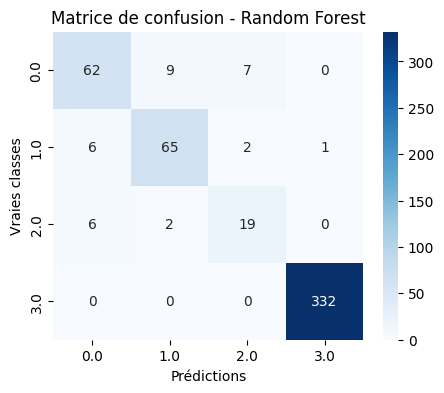

Random Forest - F1: 0.9353 - Accuracy: 0.9354 - Temps: 0.92s
###################################################################

Évaluation de Logistic Regression...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


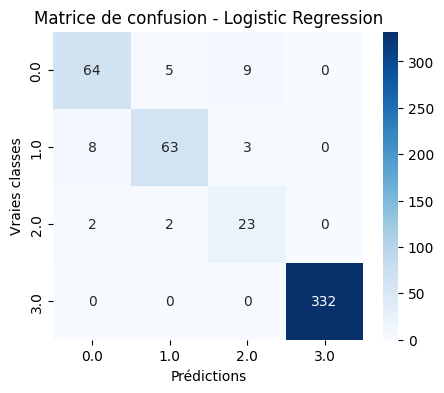

Logistic Regression - F1: 0.9442 - Accuracy: 0.9432 - Temps: 1.56s
###################################################################

Évaluation de SVC...


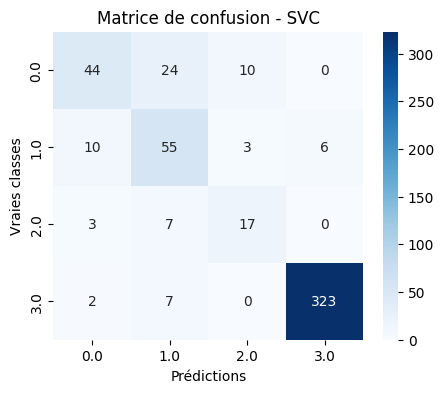

SVC - F1: 0.8599 - Accuracy: 0.8591 - Temps: 0.20s
###################################################################

Évaluation de KNN...


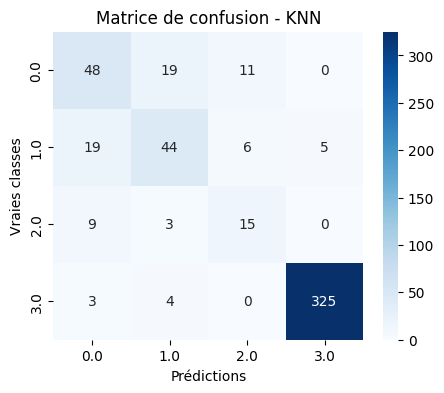

KNN - F1: 0.8466 - Accuracy: 0.8454 - Temps: 0.13s
###################################################################

Évaluation de Gradient Boosting...


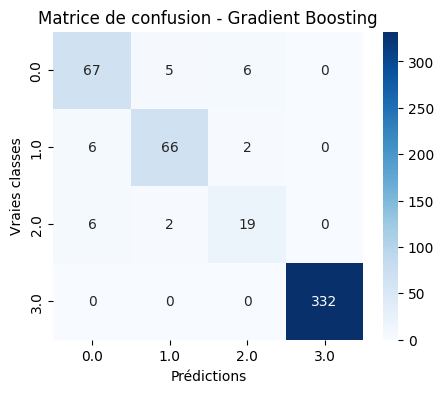

Gradient Boosting - F1: 0.9472 - Accuracy: 0.9472 - Temps: 17.48s
###################################################################
	
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prédiction du 24 heures de consommation de chauffage
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prediction based on : Text and Tint
Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mae: nan - mse: nan - val_los

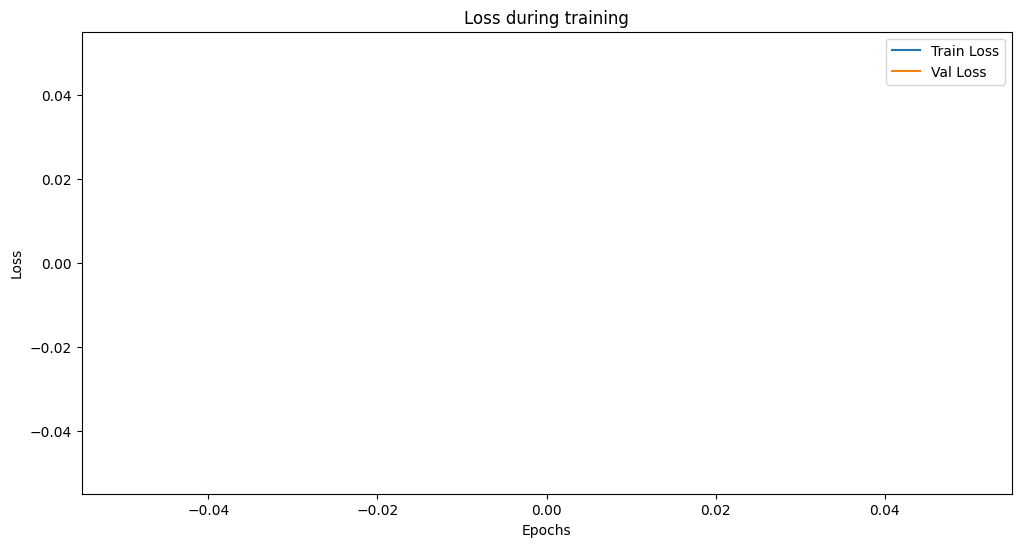

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: nan - mae: nan - mse: nan
Validation Loss : nan
Validation MAE: nan
Validation MSE: nan
Validation RMSE: nan
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


ValueError: Input contains NaN.

In [ ]:

clustering_heat_toulouse = clustering(
    df=consommation_chauffage,  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)


Text_Tint_conso_heat_tou = add_profil_and_status(
    input_df=Text_Tint,
    conso_df=clustering_heat_toulouse,
    status_col="heat_on",
    profil_cols=["clusters_1"]
)
print("-"*100)
print("-"*100)
print("Prédiction du profil de consommation de chauffage")
print("-"*100)
print("-"*100)



re, Test_Text_Tint_heat_toulouse = evaluate_models_split(
    df=Text_Tint_conso_heat_tou,
    target_cols="clusters_1",
    models=models,
    split_ratio=8
)

print("\t")
print("-"*100)
print("-"*100)
print("Prédiction du 24 heures de consommation de chauffage")
print("-"*100)
print("-"*100)

X_train2, X_test2, y_train2, y_test2 , scaler_temp, scaler_cons  = preprocess_data2(
    Text_Tint,
    clustering_heat_toulouse,
    Text_Tint_conso_heat_tou,
    "Text_Tint_combined_toulouse"
)

model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2, 
    y_train2, 
    X_test2, 
    y_test2, 
    scaler_temp, 
    scaler_cons
)
  